In [15]:
from __future__ import absolute_import, division, print_function

In [16]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/")


Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [18]:
def display_digit(digit):
    plt.imshow(digit.reshape(28,28), cmap="Greys", interpolation="nearest")
    

In [19]:
tr_digits, tr_labels = mnist.train.next_batch(10000)
tst_digits, tst_labels = mnist.test.next_batch(200)

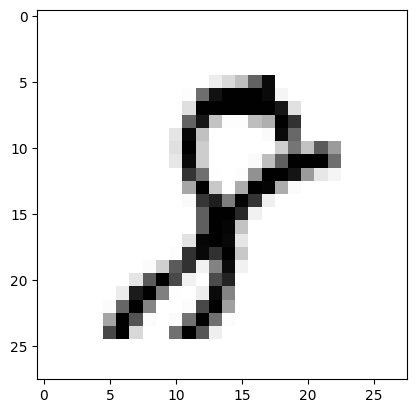

In [20]:
display_digit(tr_digits[42])


In [21]:
tf.reset_default_graph()



In [22]:
tr_digit_pl = tf.placeholder("float",[None, 784])
tst_digit_pl = tf.placeholder("float", [784])

In [23]:
def get_majority_predicted_label(labels,indices):
    predict = []
    for i in indices:
        predict.append(labels[i])
    predict = np.array(predict)
    print(predict)
    counts = np.bincount(predict)
    return np.argmax(counts)
        

In [24]:
l1_dist = tf.abs(tf.subtract(tr_digit_pl, tst_digit_pl))
dist_l1 = tf.reduce_sum(l1_dist, axis=1)
pred_knn_l1 = tf.nn.top_k(tf.negative(dist_l1), k=5)

In [25]:
accuracy = 0.
init = tf.global_variables_initializer()

In [26]:
with tf.Session() as sess: 
    sess.run(init)
    for i in range(len(tst_digits)):
        _, indices = sess.run(pred_knn_l1, 
                              feed_dict={tr_digit_pl: tr_digits, tst_digit_pl: tst_digits[i,:]})
        predicted_label = get_majority_predicted_label(tr_labels, indices)
        print("Test", i, "Prediction:", predicted_label, "True Label:", tst_labels[i])
        if predicted_label == tst_labels[i]:
            accuracy += 1./len(tst_digits)
    print("Done")
    print("accuracy:", accuracy)

[3 3 3 5 3]
Test 0 Prediction: 3 True Label: 3
[8 8 8 8 8]
Test 1 Prediction: 8 True Label: 8
[4 4 4 4 4]
Test 2 Prediction: 4 True Label: 4
[9 9 9 9 9]
Test 3 Prediction: 9 True Label: 9
[9 9 7 9 9]
Test 4 Prediction: 9 True Label: 9
[3 3 3 3 3]
Test 5 Prediction: 3 True Label: 3
[3 3 3 3 3]
Test 6 Prediction: 3 True Label: 3
[3 3 3 3 3]
Test 7 Prediction: 3 True Label: 3
[1 1 1 1 1]
Test 8 Prediction: 1 True Label: 1
[9 9 9 9 9]
Test 9 Prediction: 9 True Label: 9
[7 7 7 7 7]
Test 10 Prediction: 7 True Label: 7
[4 4 4 9 4]
Test 11 Prediction: 4 True Label: 4
[0 0 0 0 0]
Test 12 Prediction: 0 True Label: 0
[4 4 4 4 4]
Test 13 Prediction: 4 True Label: 4
[7 7 7 7 7]
Test 14 Prediction: 7 True Label: 7
[3 3 3 3 3]
Test 15 Prediction: 3 True Label: 3
[2 2 2 2 2]
Test 16 Prediction: 2 True Label: 2
[5 5 5 6 5]
Test 17 Prediction: 5 True Label: 5
[8 8 8 8 8]
Test 18 Prediction: 8 True Label: 8
[8 8 8 8 8]
Test 19 Prediction: 8 True Label: 8
[3 3 3 3 3]
Test 20 Prediction: 3 True Label: 3
[0

In [27]:
l2_dist = tf.square(tf.subtract(tr_digit_pl, tst_digit_pl))
dist_l2 = tf.sqrt(tf.reduce_sum(l2_dist, axis=1))
pred_knn_l2 = tf.nn.top_k(tf.negative(dist_l2), k=5)
accuracy = 0.


In [28]:
with tf.Session() as sess: 
    sess.run(init)
    for i in range(len(tst_digits)):
        _, indices = sess.run(pred_knn_l2, 
                              feed_dict={tr_digit_pl: tr_digits, tst_digit_pl: tst_digits[i,:]})
        predicted_label = get_majority_predicted_label(tr_labels, indices)
        print("Test", i, "Prediction:", predicted_label, "True Label:", tst_labels[i])
        if predicted_label == tst_labels[i]:
            accuracy += 1./len(tst_digits)
    print("Done")
    print("accuracy:", accuracy)

[3 3 3 3 3]
Test 0 Prediction: 3 True Label: 3
[8 8 8 8 8]
Test 1 Prediction: 8 True Label: 8
[4 4 4 4 4]
Test 2 Prediction: 4 True Label: 4
[9 9 9 9 9]
Test 3 Prediction: 9 True Label: 9
[9 9 9 7 9]
Test 4 Prediction: 9 True Label: 9
[3 3 3 3 3]
Test 5 Prediction: 3 True Label: 3
[3 3 3 3 3]
Test 6 Prediction: 3 True Label: 3
[3 3 3 3 3]
Test 7 Prediction: 3 True Label: 3
[1 1 1 1 1]
Test 8 Prediction: 1 True Label: 1
[9 9 9 9 9]
Test 9 Prediction: 9 True Label: 9
[7 7 7 7 7]
Test 10 Prediction: 7 True Label: 7
[4 4 4 4 4]
Test 11 Prediction: 4 True Label: 4
[0 0 0 0 0]
Test 12 Prediction: 0 True Label: 0
[4 4 4 4 4]
Test 13 Prediction: 4 True Label: 4
[7 7 7 7 7]
Test 14 Prediction: 7 True Label: 7
[3 3 3 3 3]
Test 15 Prediction: 3 True Label: 3
[2 2 2 2 2]
Test 16 Prediction: 2 True Label: 2
[5 5 6 8 5]
Test 17 Prediction: 5 True Label: 5
[8 8 8 8 8]
Test 18 Prediction: 8 True Label: 8
[8 8 8 8 8]
Test 19 Prediction: 8 True Label: 8
[3 3 3 3 3]
Test 20 Prediction: 3 True Label: 3
[0